In [15]:
from scipy import * 

In [14]:
# scipy builds on top of low_level numpy framework 
# for multidimensional arrays provides higher_level algos
# like integration, optimization, interpolation, fourier transform, signal processing
# linear algibra, Eigenvalue ....

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import Image

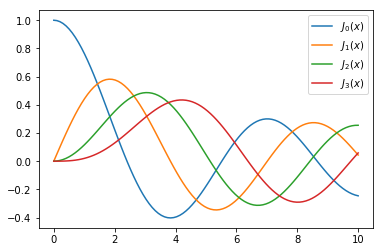

In [20]:
#special function
#bessel function
x = linspace(0,10,100)
fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n,x), label = r"$J_%d(x)$" % n)
ax.legend()

In [7]:
#integration
#Numerical integration: quadrature
from scipy.integrate import quad, dblquad, tplquad# for single, double, triple integrals
help(quad)
from scipy.special import jn, yn, jn_zeros, yn_zeros

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : {function, scipy.LowLevelCallable}
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
    
        If the user desires improved integration performance, then `f` may
        be a `scipy.LowLevelCallable` with one of the signatures::
    
            double func(double x)
            double func(double x, void *user_data)
            double func(int n, double *xx)
            double func(int n, double *xx, void *user_data)
    
        The ``user_data`` is the 

In [17]:
def f(x):
    return x
x_lower, x_upper = 0,1
val, abserr = quad(f, x_lower, x_upper)
print("integral value = ", val, "absolute error = ", abserr)

def integrand(x, n):
    #get the integrand of Bessel function
    return jn(n, x)
y_lower = 0
y_upper = 10
val_y, abserr_y = quad(integrand, y_lower, y_upper, args = (3,))
print("integral value = ", val_y, "absolute error = ", abserr_y)


integral value =  0.5 absolute error =  5.551115123125783e-15
integral value =  0.7366751370811073 absolute error =  9.389126882496405e-13


In [21]:
#for simple functions, use lambda function(name_less_function) 
#instead of explicitly defining a function for integrand
#lambda x == f(x)
val_z, abserr_z = quad(lambda x: exp(-x**2), -Inf, Inf)
print("numerical = ", val_z, abserr_z)

numerical =  1.7724538509055159 1.4202636781830878e-08


In [24]:
#Higher dimensional integration:
def integrand(x, y):
    return exp(-x**2-y**2)

x_lower = 0  
x_upper = 10
y_lower = 0
y_upper = 10

val, abserr = dblquad(integrand, x_lower, x_upper, lambda x : y_lower, lambda x: y_upper)
#have to pass x for y_lower/y_upper, because y depends on x
print (val, abserr)

0.7853981633974476 1.375309851021853e-08


In [ ]:
#Ordinary differential equations(ODEs)
#2 ways: odeint, ode
from scipy.integrate import odeint, ode
